<a href="https://colab.research.google.com/github/priyanu17/churn_modelling/blob/master/advanced_churn_analysis_case_study_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [393]:
import warnings 
warnings.filterwarnings("ignore")

In [394]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [395]:
# load the data :

churn_data = pd.read_csv("CS_2_Telco_Customer_Churn.csv")

In [396]:
# head of data 

churn_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [397]:
# columns in data

churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [398]:
# numeber of rows and columns 

churn_data.shape

(7043, 21)

In [399]:
# we have 7043 rows and 21 columns in the dataset

In [400]:
# info on data

churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [401]:
# we have less numeric columns (only 3)

In [402]:
# dtypes

churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [403]:
churn_data = churn_data[churn_data["TotalCharges"] != " "]

In [404]:
# convert "TotalCharges" into "numeric" type
churn_data["TotalCharges"] = pd.to_numeric(churn_data["TotalCharges"])

In [405]:
churn_data.shape

(7032, 21)

In [406]:
# describe on dataset 

churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [407]:
# check for duplicate rows in the data

churn_data.duplicated(keep = 'first').value_counts()

False    7032
dtype: int64

In [408]:
# no duplicate entries are present 

In [409]:
# function to check for constant feature columns :

def find_constant_features(dataFrame):
  const_features = []
  for column in dataFrame.columns.to_list():
    if dataFrame[column].unique().size < 2:
      const_features.append(column)
  return const_features
  

In [410]:
find_constant_features(churn_data)

[]

In [411]:
# no constant features are present

In [412]:
# checking for null values:

churn_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [413]:
# no null values are present

In [414]:
# data is majorly categorical, hence, checking for unique values
churn_data.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [415]:
# target variable
churn_data["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

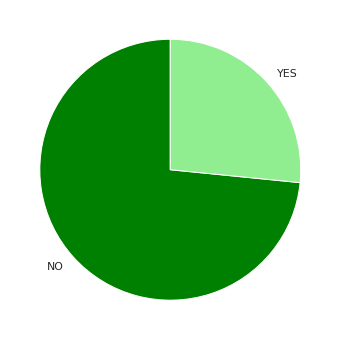

In [416]:
# pie chart for target variable
plt.figure(figsize = (6, 6))
plt.pie(x = churn_data["Churn"].value_counts(), labels = ["NO", "YES"], startangle = 90, colors = ["green", "lightgreen"])
plt.show()

In [417]:
# value_counts()

for column in churn_data.columns[:10]:
  print( "Column is : " + column)
  print(churn_data[column].value_counts())
  print()

Column is : customerID
8603-IJWDN    1
2862-JVEOY    1
2694-CIUMO    1
6340-DACFT    1
4724-WXVWF    1
             ..
4325-NFSKC    1
6652-YFFJO    1
1552-TKMXS    1
3956-MGXOG    1
6537-OTKMY    1
Name: customerID, Length: 7032, dtype: int64

Column is : gender
Male      3549
Female    3483
Name: gender, dtype: int64

Column is : SeniorCitizen
0    5890
1    1142
Name: SeniorCitizen, dtype: int64

Column is : Partner
No     3639
Yes    3393
Name: Partner, dtype: int64

Column is : Dependents
No     4933
Yes    2099
Name: Dependents, dtype: int64

Column is : tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

Column is : PhoneService
Yes    6352
No      680
Name: PhoneService, dtype: int64

Column is : MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

Column is : InternetService
Fiber optic    3096
DSL      

In [418]:
# value_counts()

for column in churn_data.columns[10:]:
  print( "Column is : " + column)
  print(churn_data[column].value_counts())
  print()

Column is : OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

Column is : DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

Column is : TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

Column is : StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

Column is : StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

Column is : Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

Column is : PaperlessBilling
Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

Column is : PaymentMethod
Electronic check             2365
Mail

In [419]:
# exploratory data analysis

In [420]:
churn_data_copy = churn_data.copy()
churn_data_copy = churn_data.drop(columns = ["customerID", "tenure", "MonthlyCharges", "TotalCharges"])

In [421]:
churn_data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [422]:
pd.crosstab( index = churn_data_copy["gender"] , columns = churn_data_copy["Churn"])

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


In [423]:
pd.crosstab( index = churn_data_copy["Partner"] , columns = churn_data_copy["Churn"])

Churn,No,Yes
Partner,,
No,2439,1200
Yes,2724,669


In [424]:
# cross tabulation data

tabular_data = pd.concat([pd.crosstab( index = churn_data_copy[x] 
                                      , columns = churn_data_copy["Churn"]) for x in churn_data_copy.columns[:-1]],
                          keys = churn_data_copy.columns[:-1])

In [425]:
tabular_data

Churn                                         No   Yes
gender           Female                     2544   939
                 Male                       2619   930
SeniorCitizen    0                          4497  1393
                 1                           666   476
Partner          No                         2439  1200
                 Yes                        2724   669
Dependents       No                         3390  1543
                 Yes                        1773   326
PhoneService     No                          510   170
                 Yes                        4653  1699
MultipleLines    No                         2536   849
                 No phone service            510   170
                 Yes                        2117   850
InternetService  DSL                        1957   459
                 Fiber optic                1799  1297
                 No                         1407   113
OnlineSecurity   No                         2036  1461
                 No internet service        1407   113
                 Yes                        1720   295
OnlineBackup     No                         1854  1233
                 No internet service        1407   113
                 Yes                        1902   523
DeviceProtection No                         1883  1211
                 No internet service        1407   113
                 Yes                        1873   545
TechSupport      No                         2026  1446
                 No internet service        1407   113
                 Yes                        1730   310
StreamingTV      No                         1867   942
                 No internet service        1407   113
                 Yes                        1889   814
StreamingMovies  No                         1843   938
                 No internet service        1407   113
                 Yes                        1913   818
Contract         Month-to-month             2220  1655
                 One year                   1306   166
                 Two year                   1637    48
PaperlessBilling No                         2395   469
                 Yes                        2768  1400
PaymentMethod    Bank transfer (automatic)  1284   258
                 Credit card (automatic)    1289   232
                 Electronic check           1294  1071
                 Mailed check               1296   308

In [426]:
# churn_percentage value (category wise):
tabular_data["positive_churn_percentage"] = ((tabular_data["Yes"] / (tabular_data["No"] + tabular_data["Yes"]))*100).round(2)
tabular_data["neagtive_churn_percentage"] = 100.00 - tabular_data["positive_churn_percentage"]

In [427]:
tabular_data

Churn                                         No  ...  neagtive_churn_percentage
gender           Female                     2544  ...                      73.04
                 Male                       2619  ...                      73.80
SeniorCitizen    0                          4497  ...                      76.35
                 1                           666  ...                      58.32
Partner          No                         2439  ...                      67.02
                 Yes                        2724  ...                      80.28
Dependents       No                         3390  ...                      68.72
                 Yes                        1773  ...                      84.47
PhoneService     No                          510  ...                      75.00
                 Yes                        4653  ...                      73.25
MultipleLines    No                         2536  ...                      74.92
                 No phone service            510  ...                      75.00
                 Yes                        2117  ...                      71.35
InternetService  DSL                        1957  ...                      81.00
                 Fiber optic                1799  ...                      58.11
                 No                         1407  ...                      92.57
OnlineSecurity   No                         2036  ...                      58.22
                 No internet service        1407  ...                      92.57
                 Yes                        1720  ...                      85.36
OnlineBackup     No                         1854  ...                      60.06
                 No internet service        1407  ...                      92.57
                 Yes                        1902  ...                      78.43
DeviceProtection No                         1883  ...                      60.86
                 No internet service        1407  ...                      92.57
                 Yes                        1873  ...                      77.46
TechSupport      No                         2026  ...                      58.35
                 No internet service        1407  ...                      92.57
                 Yes                        1730  ...                      84.80
StreamingTV      No                         1867  ...                      66.46
                 No internet service        1407  ...                      92.57
                 Yes                        1889  ...                      69.89
StreamingMovies  No                         1843  ...                      66.27
                 No internet service        1407  ...                      92.57
                 Yes                        1913  ...                      70.05
Contract         Month-to-month             2220  ...                      57.29
                 One year                   1306  ...                      88.72
                 Two year                   1637  ...                      97.15
PaperlessBilling No                         2395  ...                      83.62
                 Yes                        2768  ...                      66.41
PaymentMethod    Bank transfer (automatic)  1284  ...                      83.27
                 Credit card (automatic)    1289  ...                      84.75
                 Electronic check           1294  ...                      54.71
                 Mailed check               1296  ...                      80.80

[43 rows x 4 columns]

## Observations from above cross_tab data:

1) "Senior Citizens" are twice as linkely to churn 

2) "Single" people are more likely to churn than people with partners

3) People with no "dependents" are more likely to churn

4) People with no "OnlineSecurity" , no "OnlineBackup" , no "DeviceProtection" and no "TechSupport" are far more likely to churn

5) People with "Contract type" as month to month have high percentage to churn

In [428]:
# Plots 
sns.set(style = "darkgrid")

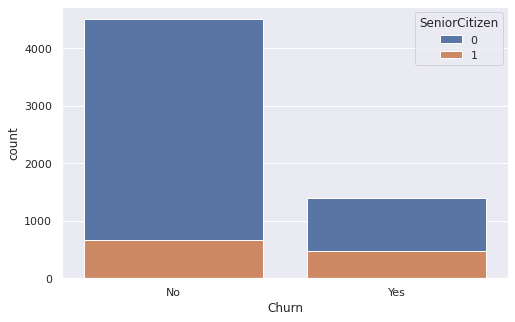

In [429]:
plt.figure( figsize = (8, 5))
sns.countplot(x="Churn", hue="SeniorCitizen", data=churn_data, dodge = False)
plt.show()

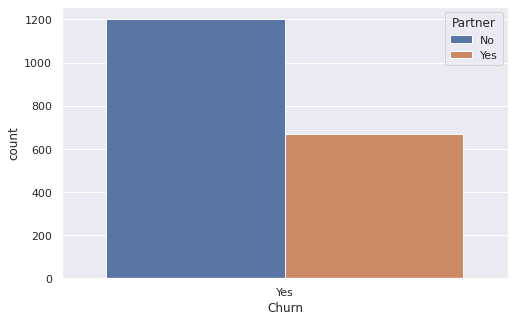

In [430]:
plt.figure( figsize = (8, 5))
sns.countplot(x="Churn", hue="Partner", data=churn_data[churn_data["Churn"] == "Yes"])
plt.show()

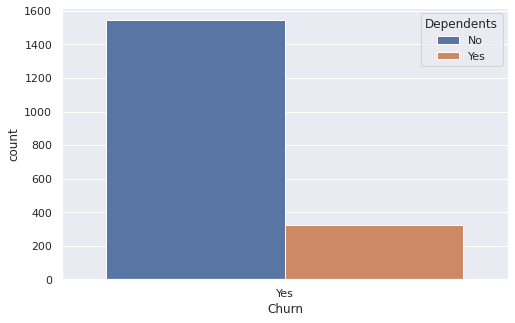

In [431]:
plt.figure( figsize = (8, 5))
sns.countplot(x="Churn", hue="Dependents", data=churn_data[churn_data["Churn"] == "Yes"])
plt.show()

In [432]:
# no dependents churn more

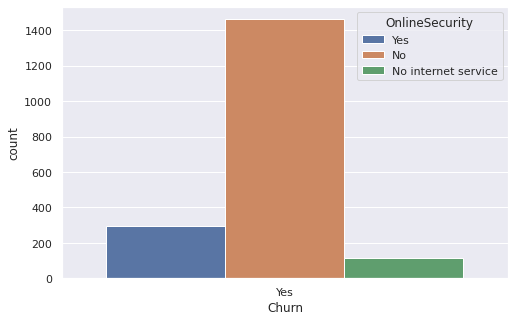

In [433]:
plt.figure( figsize = (8, 5))
sns.countplot(x="Churn", hue="OnlineSecurity", data=churn_data[churn_data["Churn"] == "Yes"])
plt.show()

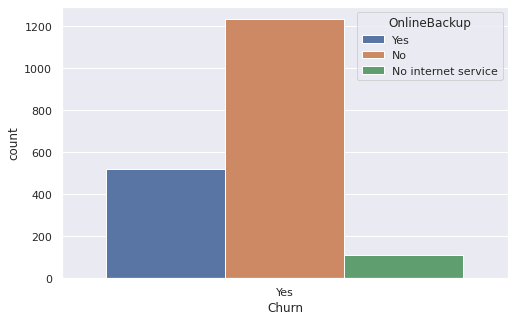

In [434]:
plt.figure( figsize = (8, 5))
sns.countplot(x="Churn", hue="OnlineBackup", data=churn_data[churn_data["Churn"] == "Yes"])
plt.show()

In [435]:
# no online security and no online backup churn more

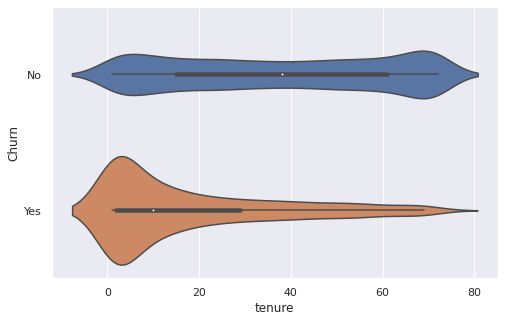

In [436]:
plt.figure( figsize = (8, 5))
sns.violinplot( x = "tenure", y = "Churn", data = churn_data)
plt.show()

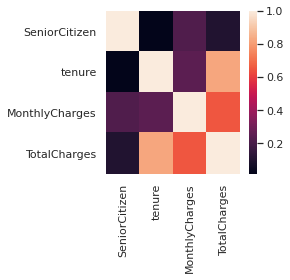

In [437]:
# correlation plot

plt.figure(figsize = (3, 3))
sns.heatmap(churn_data.corr())
plt.show()

In [438]:
from sklearn.preprocessing import LabelEncoder

# find all binary categorical columns

binary_columns = churn_data.nunique()[churn_data.nunique() == 2].index.to_list()

le = LabelEncoder()

for column in binary_columns:
  churn_data[column] = le.fit_transform(churn_data[column])

In [439]:
churn_data.nunique()[churn_data.nunique() == 2].index.to_list()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [440]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [441]:
# target variable after label encoding
churn_data["Churn"].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [442]:
# one-Hot Encoding of categorical columns using dummies

In [443]:
# extracting categorical columns

#cat_columns = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
#              "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]

cat_columns = churn_data.nunique()[churn_data.nunique() > 2 ][churn_data.nunique() < 5].index.to_list()
cat_columns

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [444]:
churn_data = pd.get_dummies(data = churn_data, columns = cat_columns, drop_first = True)

In [445]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [446]:
# drop "customerID"
churn_data = churn_data.drop(columns = ["customerID"])
churn_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [447]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [448]:
churn_data.shape

(7032, 31)

In [449]:
# spilt data in train and test
from sklearn.model_selection import train_test_split

X = churn_data.drop(columns = ["Churn"]).values
y = churn_data["Churn"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True)

In [450]:
X_train[: , [4, 7, 8]]

array([[6.60000e+01, 6.69000e+01, 4.37025e+03],
       [1.40000e+01, 8.09000e+01, 1.15280e+03],
       [2.00000e+00, 7.07500e+01, 1.46900e+02],
       ...,
       [3.30000e+01, 9.50000e+01, 3.00815e+03],
       [1.70000e+01, 9.42000e+01, 1.60815e+03],
       [1.90000e+01, 3.49500e+01, 6.10200e+02]])

In [451]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[: , [4, 7, 8]] = sc.fit_transform(X_train[: , [4, 7, 8]])
X_test[: , [4, 7, 8]] = sc.transform(X_test[: , [4, 7, 8]])


In [452]:
X_train[: , [4, 7, 8]]

array([[ 1.36356423,  0.05543956,  0.91382634],
       [-0.74875685,  0.52211401, -0.5048557 ],
       [-1.23621556,  0.18377503, -0.94839088],
       ...,
       [ 0.02305277,  0.99212186,  0.31323059],
       [-0.62689218,  0.96545475, -0.30407655],
       [-0.54564906, -1.00957823, -0.74410631]])

In [453]:
# Data Modelling

In [454]:
# Model 1 : Logistic Regression

In [455]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver = 'saga', max_iter = 200, multi_class = 'ovr')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [456]:
y_pred_LR = log_reg.predict(X_test)

In [457]:
score_LR = log_reg.score(X_test, y_test)

In [458]:
print("Accuracy of Logistic Regression : " + str(score_LR))

Accuracy of Logistic Regression : 0.8117178612059158


In [459]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix for the Logistic Regression model : ")
print(confusion_matrix(y_test, y_pred_LR))

print()

print("Classification Report for the Logistic Regression model : ")
print(classification_report(y_test, y_pred_LR))

Confusion Matrix for the Logistic Regression model : 
[[1190  126]
 [ 205  237]]

Classification Report for the Logistic Regression model : 
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1316
           1       0.65      0.54      0.59       442

    accuracy                           0.81      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.80      0.81      0.81      1758



In [460]:
# Recall value is not ideal for the classifier

In [461]:
# coefficients of the features in the decision function
coef = log_reg.coef_[0]

In [462]:
coef

array([-0.05631817,  0.2034217 ,  0.00695373, -0.23224075, -1.30681658,
       -0.25011216,  0.3471259 , -0.19028044,  0.57997428,  0.24327001,
        0.36004183,  0.82277394, -0.15392535, -0.15392535, -0.35473131,
       -0.15392535, -0.06414816, -0.15392535, -0.04717163, -0.15392535,
       -0.38125075, -0.15392535,  0.26123933, -0.15392535,  0.27298212,
       -0.65823307, -1.45627912, -0.11888324,  0.36491638, -0.03656733])

In [463]:
coef = [abs(x) for x in (list(coef))]

In [464]:
cols = list(churn_data.columns)
cols.remove("Churn")
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [465]:
log_reg_column_coef = pd.DataFrame(data = {"Columns" : cols, "Coefficient" : coef} )
log_reg_column_coef

,Columns,Coefficient
0,gender,0.056318
1,SeniorCitizen,0.203422
2,Partner,0.006954
3,Dependents,0.232241
4,tenure,1.306817
5,PhoneService,0.250112
6,PaperlessBilling,0.347126
7,MonthlyCharges,0.190280
8,TotalCharges,0.579974
9,MultipleLines_No phone service,0.243270


In [466]:
# here the order of columns denotes how strongly correlated they are to the target variable 

log_reg_column_coef.sort_values(by = ["Coefficient"], ascending= False)

,Columns,Coefficient
26,Contract_Two year,1.456279
4,tenure,1.306817
11,InternetService_Fiber optic,0.822774
25,Contract_One year,0.658233
8,TotalCharges,0.579974
20,TechSupport_Yes,0.381251
28,PaymentMethod_Electronic check,0.364916
10,MultipleLines_Yes,0.360042
14,OnlineSecurity_Yes,0.354731
6,PaperlessBilling,0.347126


In [467]:
# "tenure" is most stringly correlated followed by "Contract_Two year"

In [468]:
# Model 2 : Support Vector Machines


In [469]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [470]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_svm[: , [4, 7, 8]] = sc.fit_transform(X_train_svm[: , [4, 7, 8]])
X_test_svm[: , [4, 7, 8]] = sc.transform(X_test_svm[: , [4, 7, 8]])


In [471]:
from sklearn.svm import LinearSVC
from sklearn.kernel_approximation import Nystroem

svm_clf = LinearSVC()
feature_map_nystroem = Nystroem(gamma=.2,
                                 random_state=1,
                                 n_components=300)
X_train_svm = feature_map_nystroem.fit_transform(X_train_svm)
X_test_svm = feature_map_nystroem.transform(X_test_svm)


In [472]:
svm_clf.fit(X_train_svm, y_train_svm)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [473]:
y_pred_svm = svm_clf.predict(X_test_svm)

In [474]:
# Accuracy of SVM Model :
score_svm = svm_clf.score(X_test_svm, y_test_svm)
print("Accuracy of the SVM Classifier : " + str(score_svm))

Accuracy of the SVM Classifier : 0.8117178612059158


In [475]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix for the SVM model : ")
print(confusion_matrix(y_test_svm, y_pred_svm))

print()

print("Classification Report for the SVM model : ")
print(classification_report(y_test_svm, y_pred_svm, target_names= ["Did not Churn", "Did Churn"]))

Confusion Matrix for the SVM model : 
[[1195  121]
 [ 210  232]]

Classification Report for the SVM model : 
               precision    recall  f1-score   support

Did not Churn       0.85      0.91      0.88      1316
    Did Churn       0.66      0.52      0.58       442

     accuracy                           0.81      1758
    macro avg       0.75      0.72      0.73      1758
 weighted avg       0.80      0.81      0.80      1758



In [476]:
# Model 3 : Random Forest Classifier

In [477]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 200, verbose = 1)
rf_clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.2s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=1, warm_start=False)

In [478]:
y_pred_rf = rf_clf.predict(X_test)
y_pred_rf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


array([0, 0, 0, ..., 0, 0, 0])

In [479]:
# Accuracy of Random Forest Classifier 
accuracy_score_rf = rf_clf.score(X_test, y_test)
print("Accuracy of the Random Forest Classifier : " + str(accuracy_score_rf))

Accuracy of the Random Forest Classifier : 0.7940841865756542


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


In [480]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix for the Random Forest model : ")
print(confusion_matrix(y_test, y_pred_rf))

print()

print("Classification Report for the Random Forest Classifier model : ")
print(classification_report(y_test, y_pred_rf, target_names= ["Did not Churn", "Did Churn"]))

Confusion Matrix for the Random Forest model : 
[[1181  135]
 [ 227  215]]

Classification Report for the Random Forest Classifier model : 
               precision    recall  f1-score   support

Did not Churn       0.84      0.90      0.87      1316
    Did Churn       0.61      0.49      0.54       442

     accuracy                           0.79      1758
    macro avg       0.73      0.69      0.71      1758
 weighted avg       0.78      0.79      0.79      1758



In [481]:
rf_clf.feature_importances_

array([0.02807354, 0.02118717, 0.02323592, 0.02115181, 0.16391017,
       0.00442208, 0.02552492, 0.1656237 , 0.19366949, 0.00469389,
       0.02192705, 0.03472873, 0.00479035, 0.00657433, 0.02471374,
       0.00511712, 0.02161681, 0.00420217, 0.02057802, 0.00647069,
       0.02662356, 0.00718665, 0.01716396, 0.00529147, 0.01832251,
       0.02232666, 0.03336716, 0.01383705, 0.04112835, 0.01254093])

In [482]:
feature_importances = pd.DataFrame(rf_clf.feature_importances_,
                                   index = cols,
                                   columns = ["importance"]).sort_values('importance', ascending = False)

In [483]:
feature_importances = feature_importances.reset_index()

In [484]:
feature_importances

,index,importance
0,TotalCharges,0.193669
1,MonthlyCharges,0.165624
2,tenure,0.163910
3,PaymentMethod_Electronic check,0.041128
4,InternetService_Fiber optic,0.034729
5,Contract_Two year,0.033367
6,gender,0.028074
7,TechSupport_Yes,0.026624
8,PaperlessBilling,0.025525
9,OnlineSecurity_Yes,0.024714


In [485]:
# Recall is low again for Random Forest Classifier
# Feature importances follows the order : "TotalCharges"  > "tenure" > "MonthlyCharges"

In [486]:
# Model 4 : Deep Learning Classifier

In [487]:
import tensorflow as tf

In [506]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

from tensorflow.keras.callbacks import ModelCheckpoint

deep_clf = Sequential()

# 1st Hidden Layer

deep_clf.add(Dense(2000, activation='relu', input_dim=30, kernel_regularizer=l2(0.01)))

# 2nd Hidden layer

deep_clf.add(Dense(1000, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))

# 3rd Hidden Layer

deep_clf.add(Dense(1000, activation='relu', kernel_regularizer=l2(0.01)))

# output layer

deep_clf.add(Dense(1, activation='sigmoid'))


checkpoint = ModelCheckpoint("deep_model_classifier_checkpoint.h5",
                             monitor = 'val_recall_10',
                             mode = 'max',
                             save_best_only = True,
                             verbose = 1)


In [507]:
# summary of the model
deep_clf.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 2000)              62000     
_________________________________________________________________
dense_58 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_59 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 1001      
Total params: 3,065,001
Trainable params: 3,065,001
Non-trainable params: 0
_________________________________________________________________


In [508]:
# compile the model
deep_clf.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = [ tf.keras.metrics.Recall()])

In [509]:
# defining early stopping
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor = 'val_recall_10',
                          min_delta = 0,
                          patience = 4,
                          verbose = 1,
                          restore_best_weights = True)

callbacks = [earlystop, checkpoint]

In [510]:
# train our classifier

batch_size = 32
epochs = 10

deep_clf_history = deep_clf.fit(X_train,
                                y_train,
                                batch_size = batch_size,
                                epochs = epochs,
                                verbose = 2,
                                callbacks = callbacks,
                                validation_data = (X_test, y_test))

Epoch 1/10

Epoch 00001: val_recall_10 improved from -inf to 0.56109, saving model to deep_model_classifier_checkpoint.h5
165/165 - 7s - loss: 2.5601 - recall_10: 0.5004 - val_loss: 0.4696 - val_recall_10: 0.5611
Epoch 2/10

Epoch 00002: val_recall_10 did not improve from 0.56109
165/165 - 7s - loss: 0.4752 - recall_10: 0.5550 - val_loss: 0.4610 - val_recall_10: 0.4231
Epoch 3/10

Epoch 00003: val_recall_10 improved from 0.56109 to 0.61312, saving model to deep_model_classifier_checkpoint.h5
165/165 - 7s - loss: 0.4693 - recall_10: 0.5305 - val_loss: 0.4671 - val_recall_10: 0.6131
Epoch 4/10

Epoch 00004: val_recall_10 did not improve from 0.61312
165/165 - 7s - loss: 0.4662 - recall_10: 0.5403 - val_loss: 0.4486 - val_recall_10: 0.4887
Epoch 5/10

Epoch 00005: val_recall_10 did not improve from 0.61312
165/165 - 7s - loss: 0.4559 - recall_10: 0.5417 - val_loss: 0.4542 - val_recall_10: 0.4050
Epoch 6/10

Epoch 00006: val_recall_10 did not improve from 0.61312
165/165 - 7s - loss: 0.452

In [511]:
deep_clf_score = deep_clf.evaluate(X_test, y_test, verbose = 2)
print("Test loss of the model : " + str( deep_clf_score[0]))
print("Test Accuracy : " + str(deep_clf_score[1]))

55/55 - 1s - loss: 0.4433 - recall_10: 0.5475
Test loss of the model : 0.44332072138786316
Test Accuracy : 0.5475113391876221


In [512]:
y_pred_deep_clf = deep_clf.predict(X_test)

In [513]:
y_pred_deep_clf = (y_pred_deep_clf > 0.5 )

In [514]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix for the Deep Classification model : ")
print(confusion_matrix(y_test, y_pred_deep_clf))

print()

print("Classification Report for the Deep Classification model : ")
print(classification_report(y_test, y_pred_deep_clf, target_names= ["Did not Churn", "Did Churn"]))

Confusion Matrix for the Deep Classification model : 
[[1184  132]
 [ 200  242]]

Classification Report for the Deep Classification model : 
               precision    recall  f1-score   support

Did not Churn       0.86      0.90      0.88      1316
    Did Churn       0.65      0.55      0.59       442

     accuracy                           0.81      1758
    macro avg       0.75      0.72      0.74      1758
 weighted avg       0.80      0.81      0.81      1758



In [515]:
# XGBoost Classifier

from xgboost import XGBClassifier

xg_clf = XGBClassifier()
xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [517]:
y_pred_xg = xg_clf.predict(X_test)
predictions = [round(value) for value in y_pred_xg]


In [520]:
from sklearn.metrics import accuracy_score
accuracy_xg = accuracy_score(y_test, predictions)
accuracy_xg

0.8156996587030717

In [521]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix for the XGBoost Classification model : ")
print(confusion_matrix(y_test, predictions))

print()

print("Classification Report for the XGBoost Classification model : ")
print(classification_report(y_test, predictions, target_names= ["Did not Churn", "Did Churn"]))

Confusion Matrix for the XGBoost Classification model : 
[[1195  121]
 [ 203  239]]

Classification Report for the XGBoost Classification model : 
               precision    recall  f1-score   support

Did not Churn       0.85      0.91      0.88      1316
    Did Churn       0.66      0.54      0.60       442

     accuracy                           0.82      1758
    macro avg       0.76      0.72      0.74      1758
 weighted avg       0.81      0.82      0.81      1758

